# OllamaBench Evaluation Notebook
This notebook provides a comparative analysis of ELO scores for various Large Language Models (LLMs) from two different sources: the public `LMArena.ai` and a personal `Meine LLM Arena`. We will visualize the data to understand the similarities, differences, and potential correlations between the two rating systems.

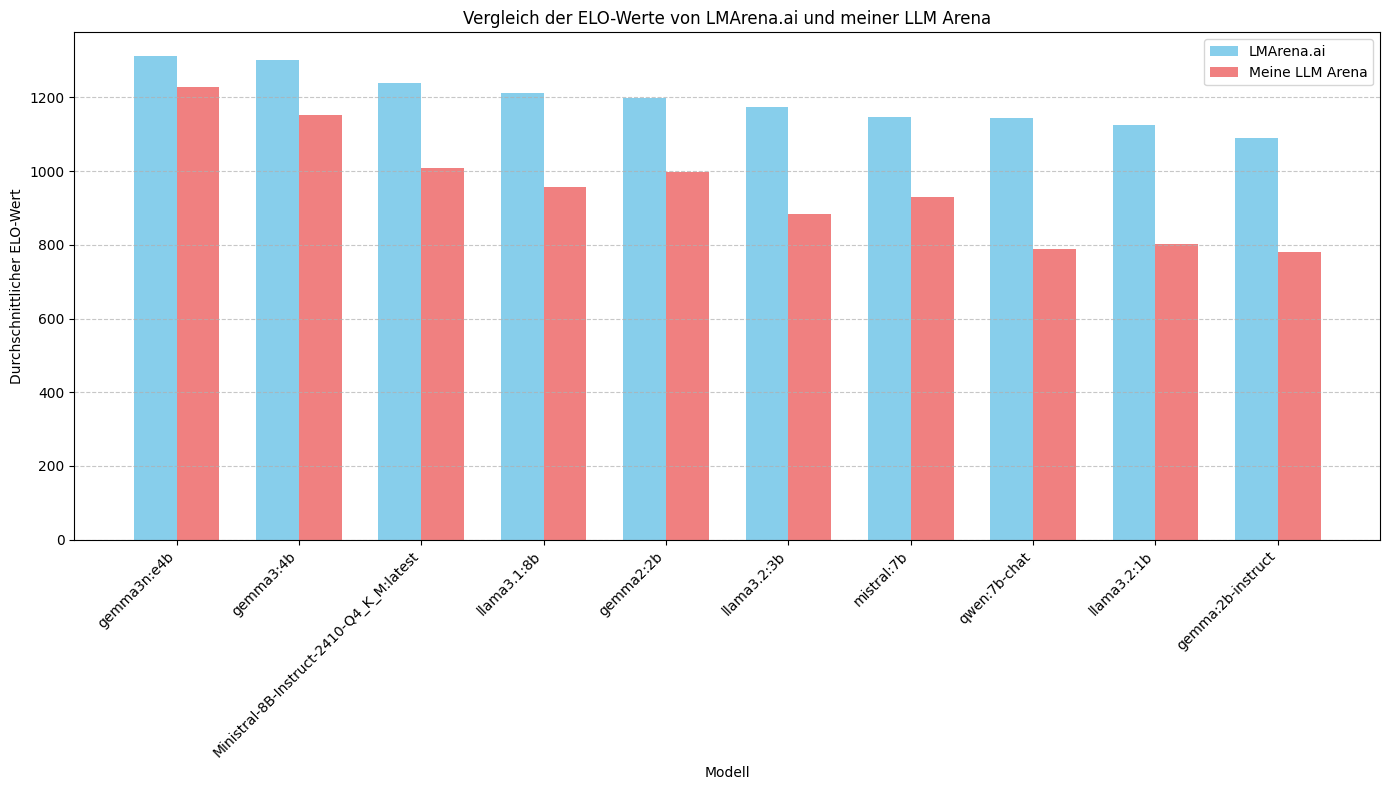

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


my_arena_data = [
    {"Model": "gemma3n:e4b", "Avg ELO": 1229.0},
    {"Model": "gemma3:4b", "Avg ELO": 1153.1},
    {"Model": "Ministral-8B-Instruct-2410-Q4_K_M:latest", "Avg ELO": 1008.6},
    {"Model": "gemma2:2b", "Avg ELO": 997.1},
    {"Model": "llama3.1:8b", "Avg ELO": 956.1},
    {"Model": "mistral:7b", "Avg ELO": 929.8},
    {"Model": "llama3.2:3b", "Avg ELO": 883.2},
    {"Model": "llama3.2:1b", "Avg ELO": 803.3},
    {"Model": "qwen:7b-chat", "Avg ELO": 788.9},
    {"Model": "gemma:2b-instruct", "Avg ELO": 780.6},
]
lm_arena_data = [
    {"Model": "gemma3n:e4b", "Avg ELO": 1311.0}, 
    {"Model": "gemma3:4b", "Avg ELO": 1301.0}, 
    {"Model": "Ministral-8B-Instruct-2410-Q4_K_M:latest", "Avg ELO": 	1240.0}, 
    {"Model": "gemma2:2b", "Avg ELO": 1198.0}, 
    {"Model": "llama3.1:8b", "Avg ELO": 1213}, 
    {"Model": "mistral:7b", "Avg ELO": 1148.0}, 
    {"Model": "llama3.2:3b", "Avg ELO": 1174.0}, 
    {"Model": "llama3.2:1b", "Avg ELO": 1125.0}, 
    {"Model": "qwen:7b-chat", "Avg ELO": 1145.0}, 
    {"Model": "gemma:2b-instruct", "Avg ELO": 1089.0}, 
]
df_lm_arena = pd.DataFrame(lm_arena_data)
df_lm_arena['Source'] = 'LMArena.ai'

df_my_arena = pd.DataFrame(my_arena_data)
df_my_arena['Source'] = 'Meine LLM Arena'

df_combined = pd.concat([df_lm_arena, df_my_arena])

model_order = df_lm_arena.sort_values(by='Avg ELO', ascending=False)['Model'].tolist()
df_combined['Model'] = pd.Categorical(df_combined['Model'], categories=model_order, ordered=True)
df_combined = df_combined.sort_values(by=['Model', 'Source'])

plt.figure(figsize=(14, 8)) 
bar_width = 0.35

models = df_combined['Model'].unique()
ind = np.arange(len(models))

lm_arena_elos = df_combined[df_combined['Source'] == 'LMArena.ai'].set_index('Model').loc[models]['Avg ELO']
plt.bar(ind - bar_width/2, lm_arena_elos, bar_width, label='LMArena.ai', color='skyblue')

my_arena_elos = df_combined[df_combined['Source'] == 'Meine LLM Arena'].set_index('Model').loc[models]['Avg ELO']
plt.bar(ind + bar_width/2, my_arena_elos, bar_width, label='Meine LLM Arena', color='lightcoral')

plt.xlabel('Modell')
plt.ylabel('Durchschnittlicher ELO-Wert')
plt.title('Vergleich der ELO-Werte von LMArena.ai und meiner LLM Arena')
plt.xticks(ind, models, rotation=45, ha='right') 
plt.legend() 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.show() 

### Conclusion
The analysis reveals two key findings:  
1.  **Strong Correlation:** The relative ranking of models is highly consistent between `LMArena.ai` and `Meine LLM Arena`. Models that perform well in one arena tend to perform well in the other.  
2.  **Systematic ELO Difference:** There is a consistent offset in the scores, with `LMArena.ai` providing significantly higher ELO ratings across the board. The average ELO score is over 200 points higher on `LMArena.ai`. This could be due to differences in the pool of voters, the types of prompts used, or the underlying ELO calculation methodology.  
Overall, while the absolute numbers differ, `Meine LLM Arena` appears to produce a relative ranking of models that is in good agreement with the larger, public `LMArena.ai`.  